### Import Packages

In [1]:
library(readxl)
library(stats)
library(data.table)
library(MASS)
library(moments)
library(car)
library(dplyr)
library(nortest)

Loading required package: carData

Attaching package: ‘dplyr’

The following object is masked from ‘package:car’:

    recode

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Ingest Data

In [2]:
data <- read.csv('./sf_airbnb_clean_subset.csv')

In [3]:
for_ratings <- read.csv('./sf_airbnb_clean.csv')

In [4]:
colnames(for_ratings)

[1] "id"                                          
 [2] "host_id"                                     
 [3] "host_response_time"                          
 [4] "host_response_rate"                          
 [5] "host_is_superhost"                           
 [6] "host_listings_count"                         
 [7] "host_total_listings_count"                   
 [8] "host_has_profile_pic"                        
 [9] "host_identity_verified"                      
[10] "neighbourhood_cleansed"                      
[11] "latitude"                                    
[12] "longitude"                                   
[13] "is_location_exact"                           
[14] "property_type"                               
[15] "room_type"                                   
[16] "accommodates"                                
[17] "bathrooms"                                   
[18] "bedrooms"                                    
[19] "beds"                                        
[20] "bed_type"                                    
[21] "price"                                       
[22] "security_deposit"                            
[23] "cleaning_fee"                                
[24] "guests_included"                             
[25] "extra_people"                                
[26] "minimum_nights"                              
[27] "maximum_nights"                              
[28] "minimum_minimum_nights"                      
[29] "maximum_minimum_nights"                      
[30] "minimum_maximum_nights"                      
[31] "maximum_maximum_nights"                      
[32] "minimum_nights_avg_ntm"                      
[33] "maximum_nights_avg_ntm"                      
[34] "calendar_updated"                            
[35] "availability_30"                             
[36] "availability_60"                             
[37] "availability_90"                             
[38] "availability_365"                            
[39] "number_of_reviews"                           
[40] "number_of_reviews_ltm"                       
[41] "review_scores_rating"                        
[42] "review_scores_accuracy"                      
[43] "review_scores_cleanliness"                   
[44] "review_scores_checkin"                       
[45] "review_scores_communication"                 
[46] "review_scores_location"                      
[47] "review_scores_value"                         
[48] "requires_license"                            
[49] "instant_bookable"                            
[50] "cancellation_policy"                         
[51] "require_guest_profile_picture"               
[52] "require_guest_phone_verification"            
[53] "calculated_host_listings_count"              
[54] "calculated_host_listings_count_entire_homes" 
[55] "calculated_host_listings_count_private_rooms"
[56] "calculated_host_listings_count_shared_rooms" 
[57] "reviews_per_month"                           
[58] "with_wifi"                                   
[59] "with_air_conditioning"                       
[60] "with_cable_tv"                               
[61] "pets_allowed"

### Subsetting Data

In [5]:
for_ratings <- for_ratings %>% select(-id, -host_id, -number_of_reviews, -number_of_reviews_ltm, -review_scores_accuracy,
                       -review_scores_cleanliness, -review_scores_checkin, -review_scores_communication, 
                       -review_scores_location, -review_scores_value)

In [6]:
colnames(data)

[1] "X"                                           
 [2] "id"                                          
 [3] "host_id"                                     
 [4] "host_response_time"                          
 [5] "host_response_rate"                          
 [6] "host_is_superhost"                           
 [7] "host_listings_count"                         
 [8] "host_total_listings_count"                   
 [9] "host_has_profile_pic"                        
[10] "host_identity_verified"                      
[11] "neighbourhood_cleansed"                      
[12] "latitude"                                    
[13] "longitude"                                   
[14] "is_location_exact"                           
[15] "property_type"                               
[16] "room_type"                                   
[17] "accommodates"                                
[18] "bathrooms"                                   
[19] "bedrooms"                                    
[20] "beds"                                        
[21] "bed_type"                                    
[22] "price"                                       
[23] "security_deposit"                            
[24] "cleaning_fee"                                
[25] "guests_included"                             
[26] "extra_people"                                
[27] "minimum_nights"                              
[28] "maximum_nights"                              
[29] "minimum_minimum_nights"                      
[30] "maximum_minimum_nights"                      
[31] "minimum_maximum_nights"                      
[32] "maximum_maximum_nights"                      
[33] "minimum_nights_avg_ntm"                      
[34] "maximum_nights_avg_ntm"                      
[35] "calendar_updated"                            
[36] "availability_30"                             
[37] "availability_60"                             
[38] "availability_90"                             
[39] "availability_365"                            
[40] "requires_license"                            
[41] "instant_bookable"                            
[42] "cancellation_policy"                         
[43] "require_guest_profile_picture"               
[44] "require_guest_phone_verification"            
[45] "calculated_host_listings_count"              
[46] "calculated_host_listings_count_entire_homes" 
[47] "calculated_host_listings_count_private_rooms"
[48] "calculated_host_listings_count_shared_rooms" 
[49] "reviews_per_month"                           
[50] "with_wifi"                                   
[51] "with_air_conditioning"                       
[52] "with_cable_tv"                               
[53] "pets_allowed"

In [7]:
subset_data  <- data %>% select(-id, 
                                -host_id, -X)

In [8]:
for_ratings <- na.omit(for_ratings)

In [9]:
head(subset_data)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,⋯,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,with_wifi,with_air_conditioning,with_cable_tv,pets_allowed
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,within a day,100,1,1,1,1,1,Western Addition,37.76931,-122.4339,⋯,0,1,1,0,0,1.74,1,0,1,0
2,within an hour,100,1,2,2,1,1,Inner Sunset,37.75402,-122.4581,⋯,0,3,0,3,0,1.28,1,0,0,0
3,within a day,80,0,2,2,1,1,Bernal Heights,37.74511,-122.4210,⋯,0,1,1,0,0,0.87,1,0,0,0
4,within an hour,86,1,10,10,1,1,Haight Ashbury,37.76669,-122.4525,⋯,0,9,0,9,0,0.15,1,0,0,0
5,within an hour,86,1,10,10,1,1,Haight Ashbury,37.76487,-122.4518,⋯,0,9,0,9,0,0.13,1,0,0,0
6,within a few hours,100,0,2,2,1,1,Western Addition,37.77525,-122.4364,⋯,1,2,2,0,0,0.23,1,0,0,0


In [10]:
colnames(subset_data)

[1] "host_response_time"                          
 [2] "host_response_rate"                          
 [3] "host_is_superhost"                           
 [4] "host_listings_count"                         
 [5] "host_total_listings_count"                   
 [6] "host_has_profile_pic"                        
 [7] "host_identity_verified"                      
 [8] "neighbourhood_cleansed"                      
 [9] "latitude"                                    
[10] "longitude"                                   
[11] "is_location_exact"                           
[12] "property_type"                               
[13] "room_type"                                   
[14] "accommodates"                                
[15] "bathrooms"                                   
[16] "bedrooms"                                    
[17] "beds"                                        
[18] "bed_type"                                    
[19] "price"                                       
[20] "security_deposit"                            
[21] "cleaning_fee"                                
[22] "guests_included"                             
[23] "extra_people"                                
[24] "minimum_nights"                              
[25] "maximum_nights"                              
[26] "minimum_minimum_nights"                      
[27] "maximum_minimum_nights"                      
[28] "minimum_maximum_nights"                      
[29] "maximum_maximum_nights"                      
[30] "minimum_nights_avg_ntm"                      
[31] "maximum_nights_avg_ntm"                      
[32] "calendar_updated"                            
[33] "availability_30"                             
[34] "availability_60"                             
[35] "availability_90"                             
[36] "availability_365"                            
[37] "requires_license"                            
[38] "instant_bookable"                            
[39] "cancellation_policy"                         
[40] "require_guest_profile_picture"               
[41] "require_guest_phone_verification"            
[42] "calculated_host_listings_count"              
[43] "calculated_host_listings_count_entire_homes" 
[44] "calculated_host_listings_count_private_rooms"
[45] "calculated_host_listings_count_shared_rooms" 
[46] "reviews_per_month"                           
[47] "with_wifi"                                   
[48] "with_air_conditioning"                       
[49] "with_cable_tv"                               
[50] "pets_allowed"

In [11]:
subset_data <- na.omit(subset_data)

### Model 1

In [12]:
model_1 <- lm(log(price + 1) ~ ., data = subset_data)
summary(model_1)


Call:
lm(formula = log(price + 1) ~ ., data = subset_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5440 -0.2271 -0.0209  0.2019  3.0582 

Coefficients: (1 not defined because of singularities)
                                                 Estimate Std. Error t value
(Intercept)                                    -3.812e+02  1.255e+02  -3.038
host_response_timewithin a day                 -1.220e-01  1.018e-01  -1.199
host_response_timewithin a few hours           -1.427e-01  1.072e-01  -1.331
host_response_timewithin an hour               -1.236e-01  1.085e-01  -1.139
host_response_rate                              1.632e-03  1.015e-03   1.607
host_is_superhost                               3.982e-02  1.328e-02   2.998
host_listings_count                             5.897e-05  6.077e-05   0.970
host_total_listings_count                              NA         NA      NA
host_has_profile_pic                            3.475e-01  1.348e-01   2.578
host_identity_verifi

In [13]:
stepAIC(model_1, direction = 'both', trace = FALSE)


Call:
lm(formula = log(price + 1) ~ host_is_superhost + host_has_profile_pic + 
    neighbourhood_cleansed + latitude + longitude + property_type + 
    room_type + accommodates + bathrooms + bedrooms + beds + 
    security_deposit + cleaning_fee + guests_included + extra_people + 
    maximum_nights + minimum_minimum_nights + maximum_minimum_nights + 
    minimum_maximum_nights + maximum_nights_avg_ntm + calendar_updated + 
    availability_30 + availability_365 + instant_bookable + require_guest_phone_verification + 
    calculated_host_listings_count + calculated_host_listings_count_entire_homes + 
    calculated_host_listings_count_shared_rooms + reviews_per_month + 
    with_wifi + with_air_conditioning + with_cable_tv + pets_allowed, 
    data = subset_data)

Coefficients:
                                (Intercept)  
                                 -3.880e+02  
                          host_is_superhost  
                                  4.911e-02  
                       ho

In [14]:
model_2 <- lm(formula = log(price + 1) ~ host_is_superhost + host_has_profile_pic + 
    neighbourhood_cleansed + property_type + 
    room_type + accommodates + bathrooms + bedrooms + beds + 
    security_deposit + cleaning_fee + guests_included + extra_people + 
    maximum_nights + minimum_minimum_nights + maximum_minimum_nights + 
    minimum_maximum_nights + maximum_nights_avg_ntm + 
    availability_30 + availability_365 + instant_bookable + require_guest_phone_verification + 
    calculated_host_listings_count  
     + reviews_per_month + 
    with_wifi + with_air_conditioning + with_cable_tv + pets_allowed, 
    data = subset_data)
summary(model_2)


Call:
lm(formula = log(price + 1) ~ host_is_superhost + host_has_profile_pic + 
    neighbourhood_cleansed + property_type + room_type + accommodates + 
    bathrooms + bedrooms + beds + security_deposit + cleaning_fee + 
    guests_included + extra_people + maximum_nights + minimum_minimum_nights + 
    maximum_minimum_nights + minimum_maximum_nights + maximum_nights_avg_ntm + 
    availability_30 + availability_365 + instant_bookable + require_guest_phone_verification + 
    calculated_host_listings_count + reviews_per_month + with_wifi + 
    with_air_conditioning + with_cable_tv + pets_allowed, data = subset_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6814 -0.2267 -0.0283  0.2090  3.1114 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                  4.162e+00  1.921e-01  21.664
host_is_superhost                            5.459e-02  1.279e-02   4.267
host_has_profile_pic                      

In [15]:
capture.output(summary(model_2), file = "myfile4.txt")

In [16]:
residuals <- resid(model_2)

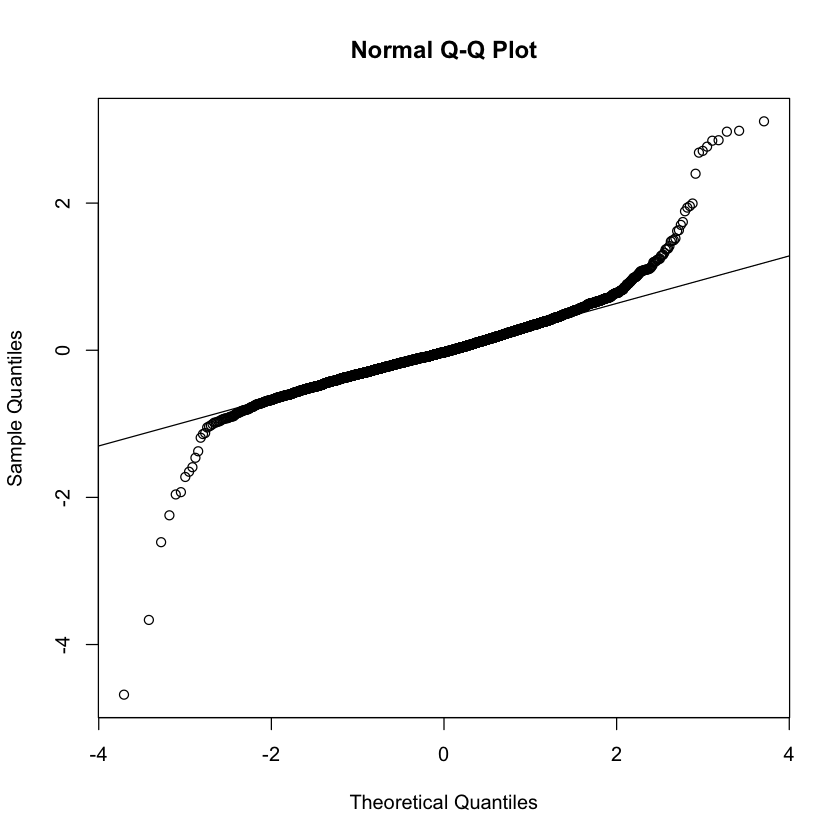

In [17]:
qqnorm(residuals)
qqline(residuals)

In [18]:
ad.test(residuals)


	Anderson-Darling normality test

data:  residuals
A = 36.76, p-value < 2.2e-16


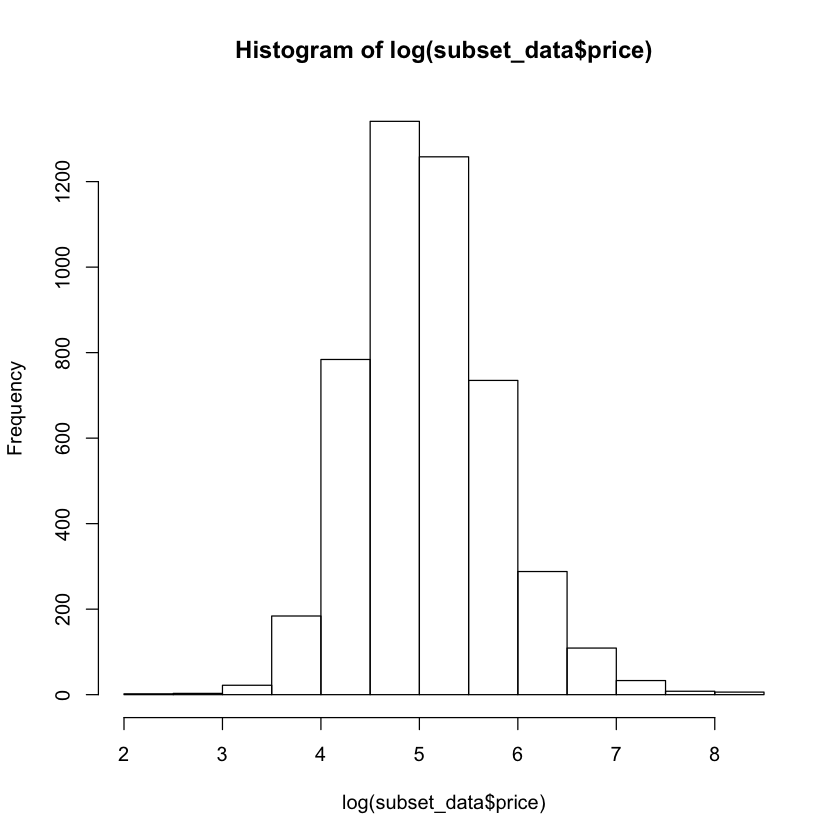

In [19]:
hist(log(subset_data$price))

In [20]:
model_3 <- lm(formula = log(price + 1) ~ host_listings_count + neighbourhood_cleansed + 
    latitude + property_type + room_type + accommodates + bathrooms + 
    bedrooms + beds + security_deposit + cleaning_fee + guests_included + 
    extra_people + minimum_minimum_nights + minimum_maximum_nights + 
    maximum_nights_avg_ntm + availability_30 + number_of_reviews + 
    number_of_reviews_ltm + review_scores_rating + review_scores_cleanliness + 
    review_scores_value + require_guest_profile_picture + calculated_host_listings_count + 
    calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + 
    reviews_per_month + with_air_conditioning + pets_allowed, 
    data = subset_data)

ERROR: Error in eval(predvars, data, env): object 'number_of_reviews' not found


In [ ]:
summary(model_3)

In [ ]:
residuals <- resid(model_3)
ad.test(residuals)

In [ ]:
qqnorm(residuals)

In [ ]:
colnames(for_ratings)

In [ ]:
ratings_model <- lm(review_scores_rating ~ ., data = for_ratings)
summary(ratings_model)

In [ ]:
stepAIC(ratings_model, direction = 'both', trace = FALSE)

In [ ]:
ratings_model_2 <- lm(formula = review_scores_rating ~ host_response_time + host_is_superhost + 
    host_listings_count + host_has_profile_pic + neighbourhood_cleansed + 
    property_type + room_type + accommodates + beds + price + 
    guests_included + extra_people + minimum_nights + maximum_nights + 
    minimum_minimum_nights + maximum_minimum_nights + maximum_maximum_nights + 
    minimum_nights_avg_ntm + calendar_updated + availability_30 + 
    availability_365 + cancellation_policy + calculated_host_listings_count + 
    calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + 
    calculated_host_listings_count_shared_rooms + with_wifi + 
    with_air_conditioning + with_cable_tv + pets_allowed, data = for_ratings)
summary(ratings_model_2)

In [ ]:
max(for_ratings$review_scores_rating)

In [ ]:
hist(1 / (101 - for_ratings$review_scores_rating))

In [ ]:
install.packages('randomForest')

In [ ]:
library(randomForest)

In [ ]:
random_forest <- randomForest(review_scores_rating ~ host_response_time + host_is_superhost + 
    host_listings_count + host_has_profile_pic + neighbourhood_cleansed + 
    property_type + room_type + accommodates + beds + price + 
    guests_included + extra_people + minimum_nights + maximum_nights + 
    minimum_minimum_nights + maximum_minimum_nights + maximum_maximum_nights + 
    minimum_nights_avg_ntm  + availability_30 + 
    availability_365 + cancellation_policy + calculated_host_listings_count + 
    calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + 
    calculated_host_listings_count_shared_rooms + with_wifi + 
    with_air_conditioning + with_cable_tv + pets_allowed, data = for_ratings)

In [ ]:
random_forest